In [1]:
!pip install gensim

In [2]:
!python -m spacy download en_core_web_md

2023-07-02 20:09:11.317456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 20:09:12.172369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
import gensim
import os
import pandas as pd
import numpy as np
import spacy as sp
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nlp = sp.load('en_core_web_md')

In [6]:
path = "/content/drive/MyDrive/Datasets - UFAM - Sprint 4 - RCS (3) - Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
df = pd.read_csv(path)

In [7]:
df.head()

,test_id,original_idx,original_step,step,labels
0,CCTEST-65303,1,"From the DUT, open Messaging app",from the dut,0.0
1,CCTEST-65303,1,"From the DUT, open Messaging app",open messaging app,0.0
2,CCTEST-65303,2,Start chat,start chat,1.0
3,CCTEST-65303,3,Select 2 or more contacts,select 2 or more contacts,1.0
4,CCTEST-65303,4,Confirm OCG creation,confirm ocg creation,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   test_id        471 non-null    object 
 1   original_idx   471 non-null    int64  
 2   original_step  471 non-null    object 
 3   step           471 non-null    object 
 4   labels         101 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


##Codigo para criar um csv com as frases unicas do RCS

In [ ]:
# Carrega o arquivo CSV
path = "/content/drive/MyDrive/Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
df = pd.read_csv(path)
# Remove as duplicatas mantendo apenas as frases únicas
frases_unicas = df['step'].unique()

# Cria um novo DataFrame com as frases únicas
novo_dataframe = pd.DataFrame({'frase': frases_unicas})

# Salva o novo DataFrame em um novo arquivo CSV
novo_dataframe.to_csv('frase_unicas.csv', index=False)

##Codigo para a partir das frases unicas rotuladas, rotular o resto

In [9]:
# Carrega o arquivo CSV com as frases únicas e seus rótulos
path = "/content/drive/MyDrive/frase_unicas - frase_unicas.csv"
frases_unicas = pd.read_csv(path)

# Carrega o arquivo CSV original com frases repetidas
path2 = "/content/drive/MyDrive/Cópia de Datasets - UFAM - Sprint 4 - RCS (3) - Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
frases_repetidas = pd.read_csv(path2)

# Combina os DataFrames com base na coluna "frase"
frases_rotuladas = pd.merge(frases_repetidas, frases_unicas, on='step', how='left')

# Salva o DataFrame com as frases rotuladas em um novo arquivo CSV
frases_rotuladas.to_csv('frases_rotuladas.csv', index=False)

In [ ]:
frases_rotuladas

##Classificacao, normalizacao, tokenizacao e remocao de stopwords

In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Lista para armazenar os tokens de cada string
tokens = []
x_strings = frases_rotuladas['step']
# Lista para armazenar as strings processadas
processed_strings = []

# Itera sobre as strings e realiza o processamento (tokenização, remoção de stopwords e normalização)
for string in x_strings:
    doc = nlp(string)
    # Extrai os tokens da string, removendo as stopwords normalização
    string_tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    # Junta os tokens em uma única string
    processed_string = ' '.join(string_tokens)
    # Adiciona a string processada à lista
    processed_strings.append(processed_string)

# Cria o objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vetoriza as strings processadas
vectorized_data = vectorizer.fit_transform(processed_strings)

# Imprime os vetores das strings
for i, vector in enumerate(vectorized_data):
    print(f"Vetor da string {i+1}: {vector.toarray()}")

A saída de streaming foi truncada nas últimas 5000 linhas.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.4281799  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
Vetor da string 183: [[0.         0.         0.      

In [ ]:
# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels = frases_rotuladas['labels_y']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_data = vectorized_data.toarray()
y_data = ylabels.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True)

# Definindo o modelo RNN
model = Sequential()
model.add(Embedding(input_dim=X_data.shape[1], output_dim=100, input_length=X_data.shape[1]))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
# Treinando o modelo com validação
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Agora o modelo está treinado e pronto para fazer previsões!
predictions = model.predict(X_test)


Epoch 1/10
11/11 [==============================] - 5s 212ms/step - loss: 0.6832 - accuracy: 0.6049 - val_loss: 0.6680 - val_accuracy: 0.6127
Epoch 2/10
11/11 [==============================] - 1s 109ms/step - loss: 0.6722 - accuracy: 0.6049 - val_loss: 0.6700 - val_accuracy: 0.6127
Epoch 3/10
11/11 [==============================] - 1s 66ms/step - loss: 0.6727 - accuracy: 0.6049 - val_loss: 0.6691 - val_accuracy: 0.6127
Epoch 4/10
11/11 [==============================] - 1s 61ms/step - loss: 0.6720 - accuracy: 0.6049 - val_loss: 0.6675 - val_accuracy: 0.6127
Epoch 5/10
11/11 [==============================] - 1s 72ms/step - loss: 0.6719 - accuracy: 0.6049 - val_loss: 0.6678 - val_accuracy: 0.6127
Epoch 6/10
11/11 [==============================] - 1s 64ms/step - loss: 0.6722 - accuracy: 0.6049 - val_loss: 0.6678 - val_accuracy: 0.6127
Epoch 7/10
11/11 [==============================] - 1s 66ms/step - loss: 0.6723 - accuracy: 0.6049 - val_loss: 0.6686 - val_accuracy: 0.6127
Epoch 8/10


In [12]:
#lista com os valores de 5 rodagens:
#zerar quando quiser desenhar o grafico

lista_accuracy =[]
lista_precision =[]
lista_recall =[]
lista_f1_score =[]

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels = frases_rotuladas['labels_y']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_data = vectorized_data.toarray()
y_data = ylabels.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True)

# Treinamento do modelo Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Classificação das frases de teste
y_pred = naive_bayes.predict(X_test)

# Avaliação do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

#adiciona os resultadaos nas listas respectivas
lista_accuracy.append(accuracy)
lista_precision.append(precision)
lista_recall.append(recall)
lista_f1_score.append(f1_score)

#printa os valores dos resultados
print("accuracy: ", accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

accuracy:  0.7394366197183099
precision:  0.7209302325581395
recall:  0.5535714285714286
f1_score:  0.6262626262626263


In [19]:
lista_accuracy

[0.7746478873239436,
 0.6830985915492958,
 0.6971830985915493,
 0.647887323943662,
 0.676056338028169,
 0.7394366197183099]

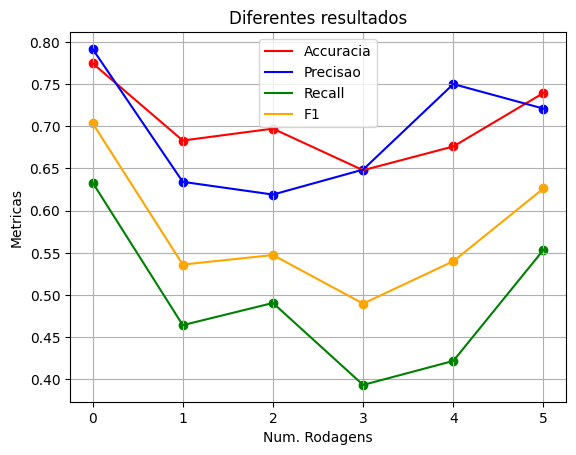

In [20]:
import matplotlib.pyplot as plt

def plot_lines(y1, y2, y3, y4):
    plt.scatter(range(len(y1)), y1, color='red')
    plt.scatter(range(len(y2)), y2, color='blue')
    plt.scatter(range(len(y3)), y3, color='green')
    plt.scatter(range(len(y4)), y4, color='orange')
    plt.plot(y1, color='red', label='Accuracia')
    plt.plot(y2, color='blue', label='Precisao')
    plt.plot(y3, color='green', label='Recall')
    plt.plot(y4, color='orange', label='F1')

    plt.xlabel('Num. Rodagens')
    plt.ylabel('Metricas')
    plt.title('Diferentes resultados')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lines(lista_accuracy, lista_precision, lista_recall, lista_f1_score)


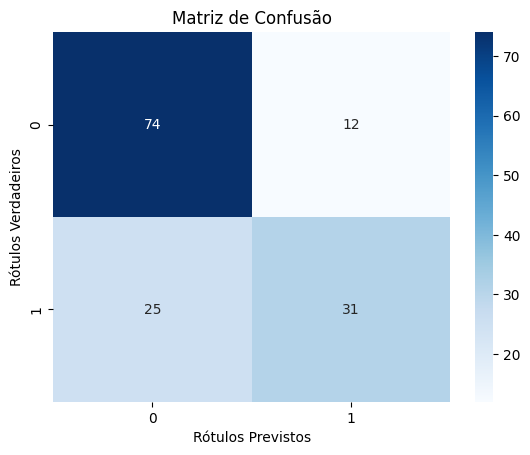

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

###Usando dados do MS2

In [22]:
# Carrega o arquivo CSV original com frases repetidas
path3 = "/content/drive/MyDrive/MS2_rotuladas - MS2_rotuladas.csv"
frases_ms2 = pd.read_csv(path3)

In [23]:
# Lista para armazenar os tokens de cada string
tokens2 = []
x_strings2 = frases_ms2['Step']
# Lista para armazenar as strings processadas
processed_strings2 = []

# Itera sobre as strings e realiza o processamento (tokenização, remoção de stopwords e normalização)
for string2 in x_strings2:
    doc = nlp(string2)
    # Extrai os tokens da string, removendo as stopwords normalização
    string_tokens2 = [token.lemma_.lower() for token in doc if not token.is_stop]
    # Junta os tokens em uma única string
    processed_string2 = ' '.join(string_tokens2)
    # Adiciona a string processada à lista
    processed_strings2.append(processed_string2)

# Cria o objeto TfidfVectorizer
vectorizer2 = TfidfVectorizer()

# Vetoriza as strings processadas
vectorized_data2 = vectorizer.fit_transform(processed_strings2)

# Imprime os vetores das strings
for i, vector in enumerate(vectorized_data2):
    print(f"Vetor da string {i+1}: {vector.toarray()}")

Vetor da string 1: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.66024276 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.      

In [24]:
# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels2 = frases_ms2['Manual Classification']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_train = vectorized_data.toarray()
y_train = ylabels.values
X_test = vectorized_data2.toarray()
y_test = ylabels2.values

# Determinar o número máximo de características nos dados de treinamento
max_features = vectorized_data2.shape[1]

# Aplicar padding nos dados de teste
num_samples, num_features = X_train.shape
if num_features < max_features:
    padding_size = max_features - num_features
    padding = np.zeros((num_samples, padding_size))
    X_train_padded = np.concatenate((X_train, padding), axis=1)
else:
    X_train_padded = X_test

# Treinamento do modelo Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_padded, y_train)

# Classificação das frases de teste
y_pred = naive_bayes.predict(X_test)

# Avaliação do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

#adiciona os resultadaos nas listas respectivas
lista_accuracy.append(accuracy)
lista_precision.append(precision)
lista_recall.append(recall)
lista_f1_score.append(f1_score)

#printa os valores dos resultados
print("accuracy: ", accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

accuracy:  0.37
precision:  0.23076923076923078
recall:  0.21428571428571427
f1_score:  0.22222222222222224


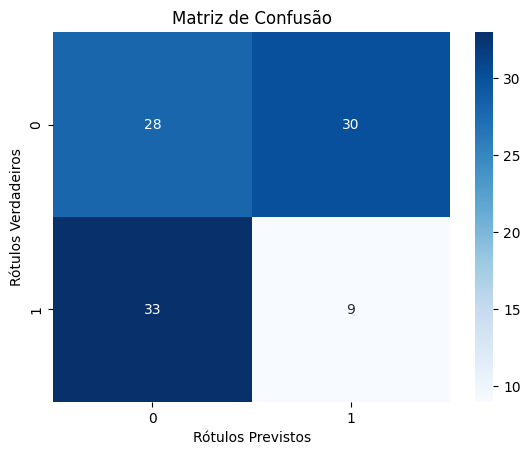

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()